In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
data = pd.read_csv('data.csv')
data_subset_coder = pd.read_csv('data_subset_CHRIS.csv')

In [6]:
data

,prompt_id,prompt_text,similarity,KA,original_prompt,task
0,0,"Does it say a cat or a dog? [Respond 0 for cat, and 1 for dog.]",0.788384,0.604167,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1
1,1,"Does the message include any information about a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.831113,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1
2,2,"Do the words describe a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.845084,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1
3,3,"Is the message about cats or dogs? [Respond 0 for cat, and 1 for dog.]",0.846404,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1
4,4,"Is the message about a cat or dog accurate? [Respond 0 for cat, and 1 for dog.]",0.850658,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1
...,...,...,...,...,...,...
145,45,"The following is a message written by either a Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.750094,1.000000,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3
146,46,"The author of the following message is either a Republican or a Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.773561,1.000000,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3
147,47,"The following is a message written by either a Republican or a Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.778299,0.808081,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3
148,48,"The following is a message written by either a Republican or Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.778427,0.808081,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3


In [7]:
data_subset_coder

,task,prompt_id,original_prompt,prompt_text,similarity_score,similarity_binary,similarity_coder
0,1,0,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]","Does it say a cat or a dog? [Respond 0 for cat, and 1 for dog.]",4.0,0.0,NaN
1,1,1,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]","Does the message include any information about a cat or dog? [Respond 0 for cat, and 1 for dog.]",6.0,1.0,NaN
2,1,2,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]","Do the words describe a cat or dog? [Respond 0 for cat, and 1 for dog.]",8.0,1.0,NaN
3,1,3,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]","Is the message about cats or dogs? [Respond 0 for cat, and 1 for dog.]",7.0,1.0,NaN
4,1,4,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]","Is the message about a cat or dog accurate? [Respond 0 for cat, and 1 for dog.]",3.0,0.0,NaN
...,...,...,...,...,...,...,...
145,3,45,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]","The following is a message written by either a Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",7.0,1.0,NaN
146,3,46,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]","The author of the following message is either a Republican or a Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",7.0,1.0,NaN
147,3,47,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]","The following is a message written by either a Republican or a Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",8.0,1.0,NaN
148,3,48,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]","The following is a message written by either a Republican or Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",8.0,1.0,NaN


In [8]:
data_merged = pd.merge(data, data_subset_coder, on=['task', 'prompt_id', 'prompt_text', 'original_prompt'], how='left')
data_merged

,prompt_id,prompt_text,similarity,KA,original_prompt,task,similarity_score,similarity_binary,similarity_coder
0,0,"Does it say a cat or a dog? [Respond 0 for cat, and 1 for dog.]",0.788384,0.604167,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,4.0,0.0,NaN
1,1,"Does the message include any information about a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.831113,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,6.0,1.0,NaN
2,2,"Do the words describe a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.845084,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,8.0,1.0,NaN
3,3,"Is the message about cats or dogs? [Respond 0 for cat, and 1 for dog.]",0.846404,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,7.0,1.0,NaN
4,4,"Is the message about a cat or dog accurate? [Respond 0 for cat, and 1 for dog.]",0.850658,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
145,45,"The following is a message written by either a Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.750094,1.000000,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3,7.0,1.0,NaN
146,46,"The author of the following message is either a Republican or a Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.773561,1.000000,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3,7.0,1.0,NaN
147,47,"The following is a message written by either a Republican or a Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.778299,0.808081,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3,8.0,1.0,NaN
148,48,"The following is a message written by either a Republican or Democrat before the election. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",0.778427,0.808081,"The following is a Twitter message written either by a Republican or a Democrat before the 2020 election. Your task is to guess whether the author is Republican or Democrat. [Respond 0 for Democrat, or 1 for Republican. Guess if you do not know. Respond nothing else.]",3,8.0,1.0,NaN


In [32]:
data_merged[data_merged['task'] == 1]

,prompt_id,prompt_text,similarity,KA,original_prompt,task,similarity_score,similarity_binary,similarity_coder
0,0,"Does it say a cat or a dog? [Respond 0 for cat, and 1 for dog.]",0.788384,0.604167,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,4.0,0.0,NaN
1,1,"Does the message include any information about a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.831113,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,6.0,1.0,NaN
2,2,"Do the words describe a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.845084,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,8.0,1.0,NaN
3,3,"Is the message about cats or dogs? [Respond 0 for cat, and 1 for dog.]",0.846404,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,7.0,1.0,NaN
4,4,"Is the message about a cat or dog accurate? [Respond 0 for cat, and 1 for dog.]",0.850658,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,3.0,0.0,NaN
5,5,"The message may or may not describe a cat or dog. [Respond 0 for cat, and 1 for dog.]",0.863973,0.808081,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,4.0,0.0,NaN
6,6,"Is the message about a cat or a dog accurate? [Respond 0 for cat, and 1 for dog.]",0.869239,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,4.0,0.0,NaN
7,7,"There is a message about a cat or dog. [Respond 0 for cat, and 1 for dog.]",0.869776,-0.043956,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,5.0,1.0,NaN
8,8,"Does the message include information about a cat or dog? [Respond 0 for cat, and 1 for dog.]",0.870629,1.000000,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,8.0,1.0,NaN
9,9,"Does the message include information about a cat or a dog? [Respond 0 for cat, and 1 for dog.]",0.878244,0.791209,"Does the message describe a cat or a dog? [Respond 0 for cat, and 1 for dog.]",1,8.0,1.0,NaN


Text(0, 0.5, 'KA')

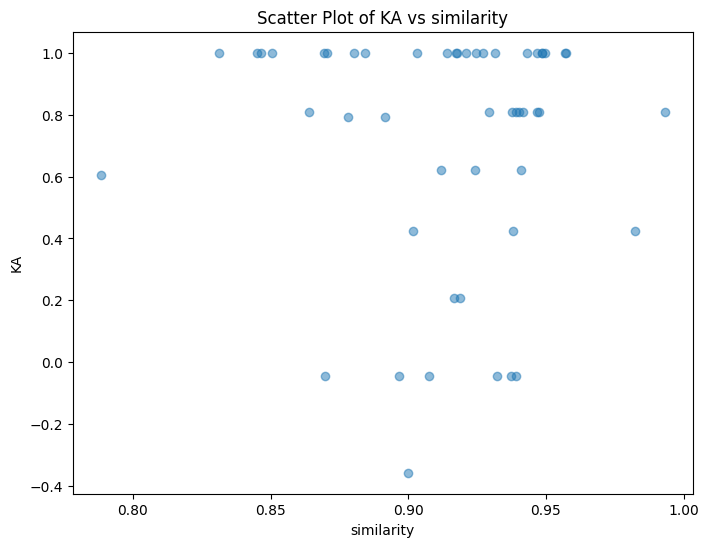

In [29]:
# Filter data
data_plt = data_merged[(data_merged['task'] == 1)]

# Extract data
x = data_plt['similarity']
y = data_plt['KA']

x_name = x.name
y_name = y.name


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)

plt.title('Scatter Plot of {} vs {}'.format(y_name, x_name))
plt.xlabel(x_name)
plt.ylabel(y_name)


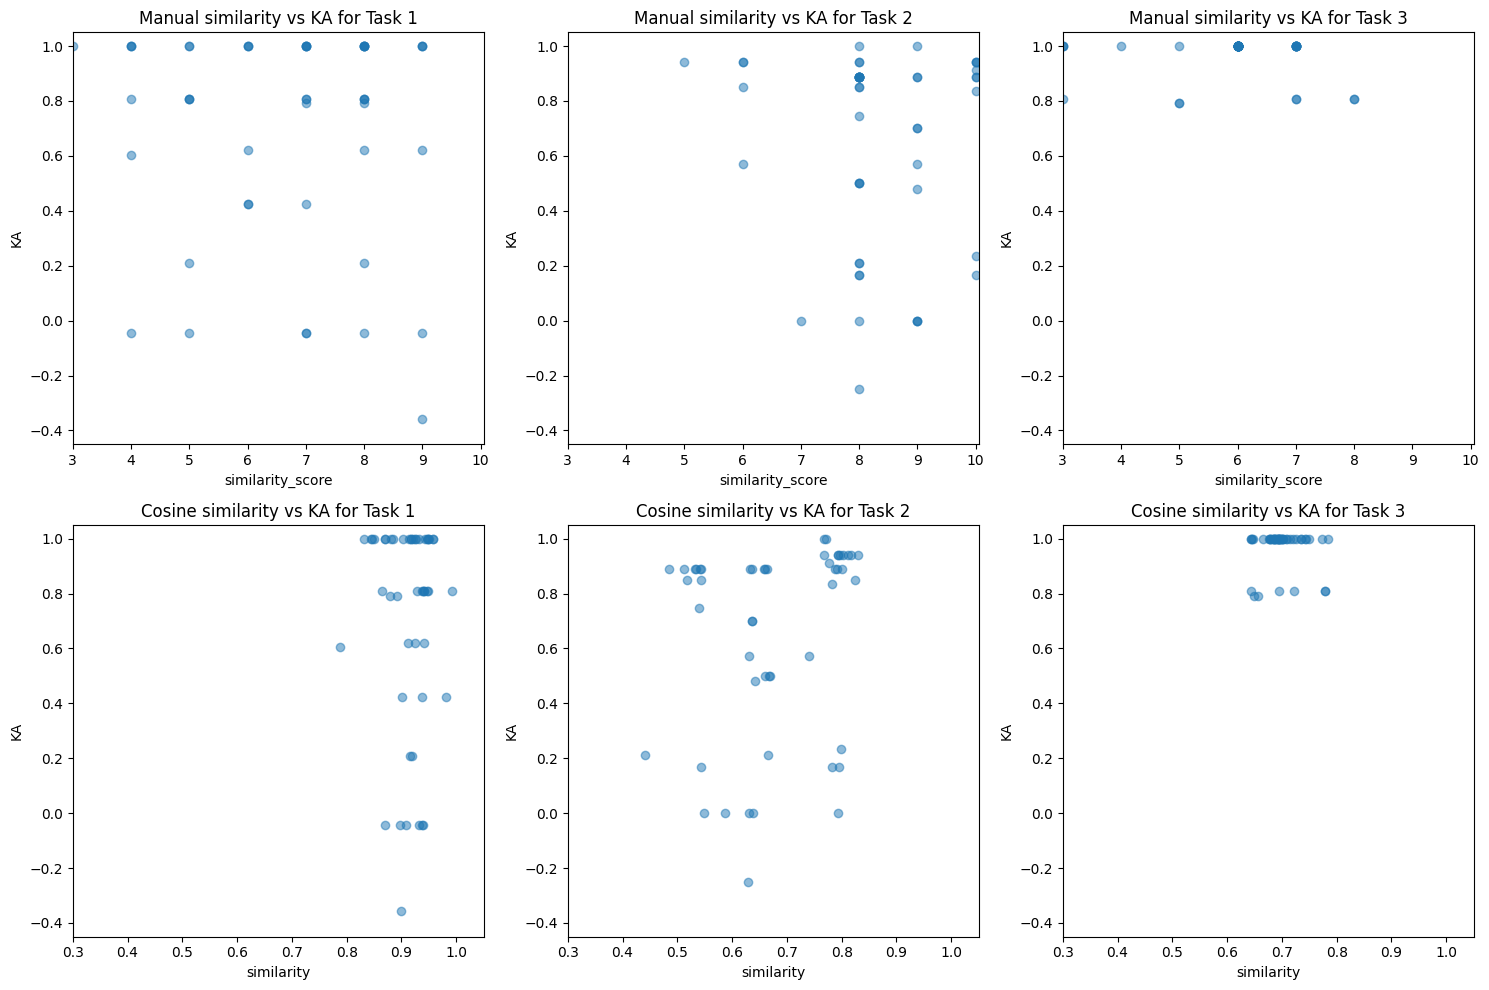

In [30]:
# Store 'task' unique values
task_values = data_merged['task'].unique()

# Create a figure with subplots arranged horizontally
fig, axs = plt.subplots(2, len(task_values), figsize=(15, 10))

# Iterate over each unique 'task' value
for i, task_value in enumerate(task_values):
    # Filter data for the current 'task' value
    data_plt = data_merged[data_merged['task'] == task_value]

    # Extract x and y values
    x = data_plt['similarity_score']
    x2 = data_plt['similarity']
    y = data_plt['KA']

    x_name = x.name
    x2_name = x2.name
    y_name = y.name

    # 1st row: Plot the scatter plot for the current 'task' value
    axs[0, i].scatter(x, y, alpha=0.5, label=f'Task {task_value}')
    axs[0, i].set_title(f'Manual similarity vs KA for Task {task_value}')
    axs[0, i].set_xlabel(x_name)
    axs[0, i].set_ylabel(y_name)
    axs[0, i].set_ylim(-0.45, 1.05)
    axs[0, i].set_xlim(3, 10.05)

    # 2nd row
    axs[1, i].scatter(x2, y, alpha=0.5, label=f'Task {task_value}')
    axs[1, i].set_title(f'Cosine similarity vs KA for Task {task_value}')
    axs[1, i].set_xlabel(x2_name)
    axs[1, i].set_ylabel(y_name)
    axs[1, i].set_ylim(-0.45, 1.05)
    axs[1, i].set_xlim(0.3, 1.05)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

In [14]:
data_merged['task'].unique()


array([1, 2, 3])